## Training a Convolutional Neural Network Model with Keras in Tensorflow

In this exercise, we will implement a convolutional neural network used for image classification with four hidden layers, using stochastic gradient descent. We will once again work with the MNIST data set, a famous collection of images used for handwriting recognition. It contains labelled images of handwritten numbers from 0 to 9. Using Keras, we will fit a CNN to classify these images. We will carry out the following steps: 

1. Import and clean the data
2. Construct the convolutional neural network
3. Train the model
4. Evaluate the model

To get started, let us import the libraries we need.


In [1]:
import tensorflow.keras as keras
import math
import time
import numpy as np
import matplotlib.pyplot as plt

### Import the Data Set and Create Training and Test Sets

The mnist data set comes preloaded in Keras. The `load_data()` function returns the data set split into training and test subsets. The cell below loads the data set and contains training and test data.

In [2]:
# The mnist data set comes preloaded in Tensorflow    
mnist = keras.datasets.mnist

# Create training and test sets
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


We've created a function `plot_imgs` to help us visualize the training data. Execute the two code cells below.

In [3]:
# Function to visualize the training data
def plot_imgs(images, labels=None):
    subplots_x = int(math.ceil(len(images) / 5))
    plt.figure(figsize=(10,2*subplots_x))
    for i in range(min(len(images), subplots_x*5)):
        plt.subplot(subplots_x,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        if labels is not None:
            plt.xlabel(labels[i])
    plt.show()
    

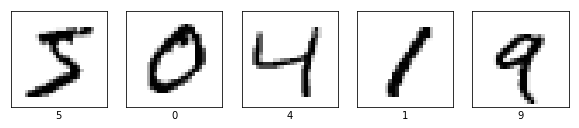

In [4]:
# Visualize some example training images
plot_imgs(x_train[:5], y_train[:5])

In [5]:
print('Number training points:',len(x_train), '\nNumber testing points :',len(x_test))

Number training points: 60000 
Number testing points : 10000


Keras downloads the images raw with pixel values between 0 and 255. We must normalize them to be between 0 and 1.

In [6]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Converting datasets of shape (num_points, 28, 28) to (num_points, 28, 28, 1)
x_train, x_test = x_train[..., np.newaxis], x_test[..., np.newaxis]

### Step 1. Define Model Structure

Constructing a hidden layer in a convolutional neural network requires composing a 2D convolution, followed by a batch normalization and then followed by a transition function. The code cell below uses the `Sequential` class to create a CNN with four hidden layers.

In [7]:
model = keras.models.Sequential()

# layer 1 (specifies initial input layer as well):
conv_1= keras.layers.Conv2D(16, 3, strides=(1, 1), input_shape=(28, 28, 1), activation=None)
batchNorm_1 =  keras.layers.BatchNormalization()
relu_1 = keras.layers.ReLU()                             
model.add(conv_1)
model.add(batchNorm_1)
model.add(relu_1)

# layer 2:
conv_2= keras.layers.Conv2D(32, 3, strides=(1, 1), activation=None)
batchNorm_2 =  keras.layers.BatchNormalization()
relu_2 = keras.layers.ReLU()
model.add(conv_2)
model.add(batchNorm_2)
model.add(relu_2)

# layer 3:
conv_3= keras.layers.Conv2D(64, 3, strides=(1, 1), activation=None)
batchNorm_3 = keras.layers.BatchNormalization()
relu_3 = keras.layers.ReLU()
model.add(conv_3)
model.add(batchNorm_3)
model.add(relu_3)

# layer 4:
conv_4= keras.layers.Conv2D(128, 3, strides=(1, 1), activation=None)
batchNorm_4 =  keras.layers.BatchNormalization()
relu_4 = keras.layers.ReLU()
model.add(conv_4)
model.add(batchNorm_4)
model.add(relu_4)

# pooling layer
pooling_layer = keras.layers.GlobalAveragePooling2D()
model.add(pooling_layer)

# output layer
output_layer = keras.layers.Dense(10, activation=None)
model.add(output_layer)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 16)        64        
_________________________________________________________________
re_lu (ReLU)                 (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        1

### Step 2. Define the Optimization Function

In [8]:
optimizer = keras.optimizers.SGD(learning_rate=0.1)

### Step 3. Define the loss function

In [9]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

### Step 4. Compile the model

In [10]:
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

### Step 5. Train the Model

We can fit the model on the training data. Since there are 60,000 training data points and nearly 100,000 parameters to fit, this may take a while to run even though we are only choosing to use 10 epochs.

In [11]:
M = 10 # Number of epochs

t0 = time.time() # start time

history = model.fit(x_train, y_train, epochs=M)

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch 1/10
1875/1875 [==============================] - 145s 77ms/step - loss: 0.3367 - accuracy: 0.9179
Epoch 2/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0992 - accuracy: 0.9731
Epoch 3/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0752 - accuracy: 0.9784
Epoch 4/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0621 - accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0548 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0497 - accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0469 - accuracy: 0.9859
Epoch 8/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0433 - accuracy: 0.9869
Epoch 9/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0397 - accuracy: 0.9880
Epoch 10/10
1875/1875 [==============================] 

### Step 6. Evaluate the Network

After all that training, let's see how we did. To do this, we'll compute the model's loss and accuracy on the hold out test set. 

In [12]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

Loss:  0.0677681490778923 Accuracy:  0.9799000024795532


Next we'll make some predictions on the test set and see for ourselves how accurate they are. The code cell below will display the first 5 images in the test set `x_test`, and below each image, it will print the predicted digit. How well did we do?

Predictions on first 5 test images:


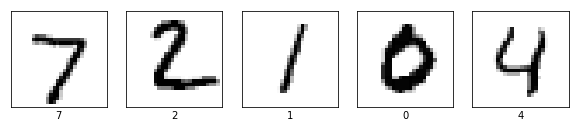

In [13]:
# Make predictions on the test set
logits = model.predict(x_test)
predictions = logits.argmax(axis = 1)

# Examine individual predictions
print('Predictions on first 5 test images:')
plot_imgs(np.squeeze(x_test * 255, axis=-1)[:5], predictions[:5])